<a href="https://colab.research.google.com/github/leodavidfan/AI_Books/blob/main/HW2_Fan_Li_SEAS8525_DA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Class_2_CL_CustomeCLFunction.ipynb**



 This code demonstrates the process of training a contrastive learning model on the CIFAR-10 dataset using a pre-trained ResNet50 as the base network. The learned representations are then visualized using t-SNE to assess the quality of the embeddings and the separation of different classes in the embedding space.



1. Importing Libraries:
   - The code imports necessary libraries such as TensorFlow, Keras, NumPy, Matplotlib, and scikit-learn.

2. Preprocessing Data:
   - The CIFAR-10 dataset is loaded using `keras.datasets.cifar10.load_data()`.
   - The `preprocess_data` function normalizes the pixel values to the range [0, 1].

3. Data Augmentation:
   - A data augmentation pipeline is defined using `keras.Sequential()` to apply random flips, rotations, and zooms to the input images.

4. Creating the Base Model:
   - The `create_base_model` function defines a base model using the ResNet50 architecture with pre-trained ImageNet weights.
   - The top layer of the base model is removed, and global average pooling and a dense layer with 128 units are added.

5. Creating Pairs:
   - The `make_pairs` function creates positive and negative pairs of images for contrastive learning.
   - Positive pairs consist of images from the same class, while negative pairs consist of images from different classes.

6. Contrastive Loss Function:
   - The `contrastive_loss` function defines the contrastive loss used for training the model.
   - It encourages the embeddings of positive pairs to be close together and the embeddings of negative pairs to be far apart.

7. Building the Contrastive Learning Model:
   - The model takes two input images and processes them using the base network.
   - The distance between the embeddings of the two images is computed using the Euclidean distance.
   - The model is compiled with the contrastive loss function and Adam optimizer.

8. Training the Model:
   - The model is trained using the generated pairs of images and their corresponding labels.
   - The training is performed for 10 epochs with a batch size of 64.

9. Extracting Representations:
   - After training, the base network is used to extract representations (embeddings) for the test images.

10. t-SNE Visualization:
    - The t-SNE algorithm is used to reduce the dimensionality of the learned representations to 2D.
    - The t-SNE results are plotted using Matplotlib, with each point colored according to its true class label.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.5082 - loss: 0.2594 - val_accuracy: 0.5132 - val_loss: 0.2525
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5053 - loss: 0.2516 - val_accuracy: 0.5075 - val_loss: 0.2510
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5006 - loss: 0.2506 - val_accuracy: 0.5053 - val_loss: 0.2504
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5020 - loss: 0.2502 - val_accuracy: 0.4988 - val_loss: 0.2501
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5024 - loss: 0.2501 - val_accuracy: 0.4998 - val_loss: 0.2500
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5004 - loss: 0.2500 - val_accuracy: 0.5009 - val_loss: 0.2500
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4796 - loss: 0.2488 - val_accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


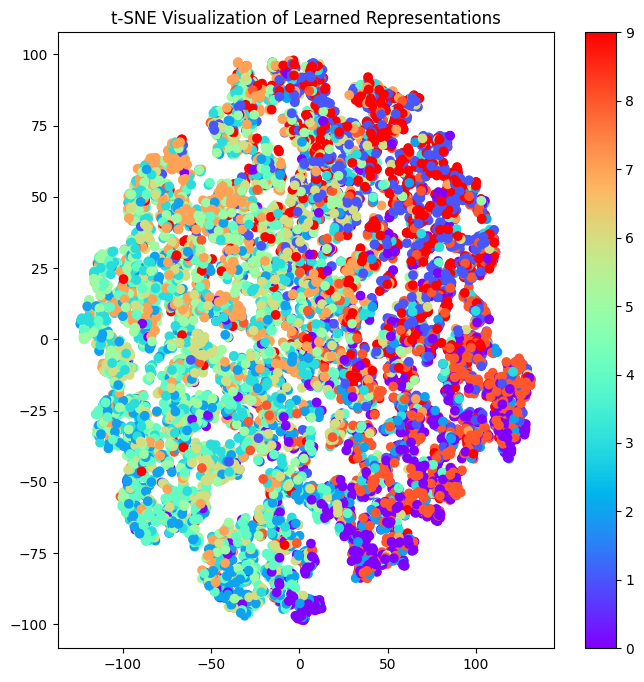

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def preprocess_data(x, y):
    x = x.astype("float32") / 255.0
    return x, y

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

def create_base_model():
    base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    inputs = keras.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(128, activation=None)(x)
    return keras.Model(inputs, outputs)

def make_pairs(images, labels):
    pair_images = []
    pair_labels = []
    labels = np.squeeze(labels)
    num_classes = np.max(labels) + 1
    idx = [np.where(labels == i)[0] for i in range(0, num_classes)]

    for idxA in range(len(images)):
        current_image = images[idxA]
        label = labels[idxA]
        idxB = np.random.choice(idx[label])
        pos_image = images[idxB]
        pair_images.append([current_image, pos_image])
        pair_labels.append([1])
        neg_idx = np.where(labels != label)[0]
        neg_image = images[np.random.choice(neg_idx)]
        pair_images.append([current_image, neg_image])
        pair_labels.append([0])

    return np.array(pair_images), np.array(pair_labels)

pair_train, label_train = make_pairs(x_train, y_train.flatten())
pair_test, label_test = make_pairs(x_test, y_test.flatten())

base_network = create_base_model()

input_a = layers.Input(shape=(32, 32, 3))
input_b = layers.Input(shape=(32, 32, 3))

processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Adjusted contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1
    y_true = tf.cast(y_true, tf.float32)  # Ensure y_true is float32 to match y_pred
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

distance = layers.Lambda(lambda embeddings: tf.norm(embeddings[0] - embeddings[1], axis=1, keepdims=True))([processed_a, processed_b])
outputs = layers.Dense(1, activation="sigmoid")(distance)
model = keras.Model(inputs=[input_a, input_b], outputs=outputs)

model.compile(loss=contrastive_loss, optimizer="adam", metrics=["accuracy"])

history = model.fit([pair_train[:, 0], pair_train[:, 1]], label_train[:],
                    validation_data=([pair_test[:, 0], pair_test[:, 1]], label_test[:]),
                    batch_size=64, epochs=10)

# Extract representations
representations = base_network.predict(x_test)

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(representations)

plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test.flatten(), cmap='rainbow')
plt.title('t-SNE Visualization of Learned Representations')
plt.colorbar()
plt.show()


**Class_2_CL_Simple.ipynb**

The SimCLR approach aims to learn meaningful representations of images in a self-supervised manner. It does this by maximizing the cosine similarity between representations of augmented views of the same image (positive pairs) and minimizing the cosine similarity between representations of different images (negative pairs). The contrastive loss encourages the encoder to learn representations that are invariant to the applied data augmentations.

The visualization using t-SNE allows us to assess the quality of the learned representations by observing how well the different classes are separated in the low-dimensional space.

This code demonstrates the implementation of a self-supervised learning approach called SimCLR (Simple Framework for Contrastive Learning of Visual Representations) using the CIFAR-10 dataset. Let's go through the code section by section:

Importing Libraries:

The necessary libraries, including TensorFlow, Keras, Matplotlib, and scikit-learn, are imported.
Loading and Preprocessing Data:

The CIFAR-10 dataset is loaded using keras.datasets.cifar10.load_data().
The pixel values of the training and testing data are normalized to the range [0, 1].
The training data is converted into a TensorFlow Dataset using tf.data.Dataset.from_tensor_slices() and batched.
Data Augmentation:

A data augmentation pipeline is defined using keras.Sequential() to apply random cropping, flipping, rescaling, and zooming to the input images.
Defining the Encoder Network:

The create_encoder function defines the base encoder network using convolutional layers, max pooling, and a global max pooling layer.
The encoder network takes an input image and outputs a 128-dimensional feature representation.
Defining the Projection Head:

The create_projection_head function defines the projection head network using dense layers.
The projection head takes the 128-dimensional feature representation from the encoder and projects it to a 128-dimensional space.
Training Loop:

The training loop runs for a specified number of epochs.
For each batch of training data:
The encoder and projection head are applied to the batch of images.
The resulting projected representations are L2-normalized.
The cosine similarity matrix is computed between the normalized representations.
The contrastive loss is calculated using the cosine similarity matrix and temperature scaling.
The gradients of the loss with respect to the weights of the encoder and projection head are computed.
The optimizer is used to update the weights of the encoder and projection head.
Extracting Representations:

After training, the trained encoder is used to extract representations (embeddings) for the test images.
t-SNE Visualization:

The t-SNE algorithm is used to reduce the dimensionality of the learned representations to 2D.
The t-SNE results are plotted using Matplotlib, with each point colored according to its true class label.


Start of epoch 0
Training loss (for one batch) at step 0: 5.376609802246094
Training loss (for one batch) at step 100: 1.633469820022583

Start of epoch 1
Training loss (for one batch) at step 0: 0.42741644382476807
Training loss (for one batch) at step 100: 0.2099531888961792

Start of epoch 2
Training loss (for one batch) at step 0: 0.12256310135126114
Training loss (for one batch) at step 100: 0.10321227461099625

Start of epoch 3
Training loss (for one batch) at step 0: 0.0731285959482193
Training loss (for one batch) at step 100: 0.061464015394449234

Start of epoch 4
Training loss (for one batch) at step 0: 0.061168599873781204
Training loss (for one batch) at step 100: 0.047874901443719864

Start of epoch 5
Training loss (for one batch) at step 0: 0.04628993570804596
Training loss (for one batch) at step 100: 0.04437132179737091

Start of epoch 6
Training loss (for one batch) at step 0: 0.03996887058019638
Training loss (for one batch) at step 100: 0.04035082831978798

Start of

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


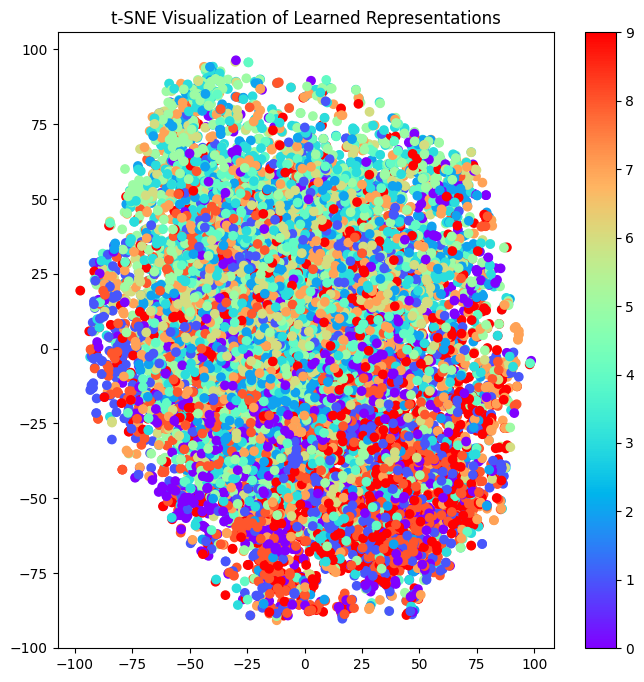

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

batch_size = 256

# Convert the training data into a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

# Define the data augmentation function
data_augmentation = keras.Sequential([
    layers.RandomCrop(height=32, width=32),
    layers.RandomFlip("horizontal"),
    layers.Rescaling(1./255),
    layers.RandomZoom(0.2),
])

# Define the base encoder network
def create_encoder():
    inputs = layers.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = layers.GlobalMaxPooling2D()(x)
    outputs = layers.Dense(128)(x)
    return keras.Model(inputs=inputs, outputs=outputs)

# Define the projection head
def create_projection_head():
    inputs = keras.Input(shape=(128,))
    x = layers.Dense(256, activation='relu')(inputs)
    outputs = layers.Dense(128)(x)
    return keras.Model(inputs=inputs, outputs=outputs)

encoder = create_encoder()
projection_head = create_projection_head()

optimizer = keras.optimizers.Adam()
batch_size = 256
epochs = 100
temperature = 0.1

# Custom training loop
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch}")
    for step, x_batch_train in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass
            encoded = encoder(x_batch_train, training=True)
            projected = projection_head(encoded, training=True)
            normalized = tf.math.l2_normalize(projected, axis=1)
            cosine_similarity = tf.matmul(normalized, normalized, transpose_b=True)
            logits = cosine_similarity / temperature
            labels = tf.range(x_batch_train.shape[0])
            loss_value = keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
            loss_value = tf.reduce_mean(loss_value)

        # Get gradients of loss wrt the weights.
        gradients = tape.gradient(loss_value, encoder.trainable_weights + projection_head.trainable_weights)

        # Update the weights of the encoder and projection head.
        optimizer.apply_gradients(zip(gradients, encoder.trainable_weights + projection_head.trainable_weights))

        if step % 100 == 0:
            print(f"Training loss (for one batch) at step {step}: {float(loss_value)}")

# Extract representations after training
representations = encoder.predict(x_test)

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(representations)

plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test.flatten(), cmap='rainbow')
plt.title('t-SNE Visualization of Learned Representations')
plt.colorbar()
plt.show()